## Life cycle of machine learning project

1.Understanding the problem statement.

2.Data collection.

3.EDA(Exploratory Data Analysis).

4.Data cleaning.

5.Data preprocessing.

6.Model Training.

7.Choose best model.


## 1.Problem statement.

This dataset contains information on the insurance claim. Each observation is different ploicyholder with various features like the age of the person, the gender of the policyholder,body mass index, providing an understanding of the body, number of children off the ploicyholder ,smoking state of the policyholder and indivisual medical costs billed by health insurance

Feature    Description

age:   age of policyholder

sex :  male(1)/female(0)

bmi:   body mass index(kg / m2)

children:    number of children/dependents of policyholder

smoker:   smoking state nonsmoker(0)/smoker(1)

region :  residential area northeast(0)/northwest(1)/southeast(2)/southwest(3)

charges:   medical cost

insuranceclaim :  yes(1)/no(0

## 2. Data collection


## 2.1) importing the data and libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## importing csv file in dataframe

In [2]:
df=pd.read_csv('C:/Users\LENOVO/OneDrive/Documents/Insurance Claim prediction(mini project).csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


## Shape of data

In [3]:
df.shape

(1338, 8)

## info of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


## Statistical description of data

In [5]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


## checking null values

In [6]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

### The dataset doesnot contain any null values

## 3. EDA(Exploratory Data Analysis)

### Feature info
. age: age of policyholder

.sex:male(1) female(0)

.bmi:body mass index(kg/m2)

.children:number of children/dependents of ploicyholder

.smoker:smoking state nonsmoker(0)/smoker(1)

.region:residential area northeast(0)/northwest(1)/southeast(2)/southwest(3)

.charges:medical cost

.insuranceclaim:yes(1)/no(0)

## variable type
.Numeric:4[age,bmi,children,charges]

.Catogorical:4[sex,smoker,region,insuranceclaim]

## Unique values in each features

In [7]:
df.nunique()


age                 47
sex                  2
bmi                548
children             6
smoker               2
region               4
charges           1337
insuranceclaim       2
dtype: int64

<AxesSubplot:xlabel='age', ylabel='charges'>

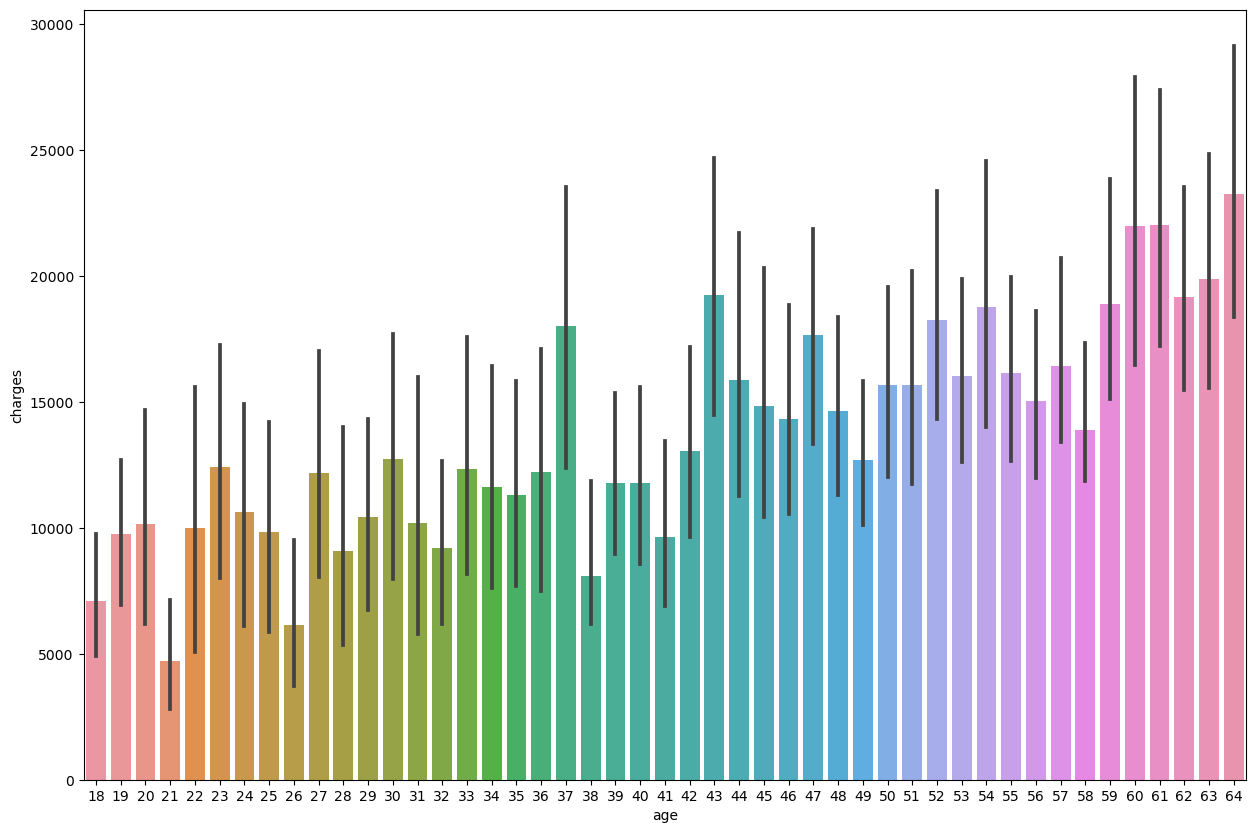

In [8]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x='age',y='charges')

##  Here we can observe that as 'AGE' is increasing 'CHARGES' are also increase 

<AxesSubplot:xlabel='smoker', ylabel='charges'>

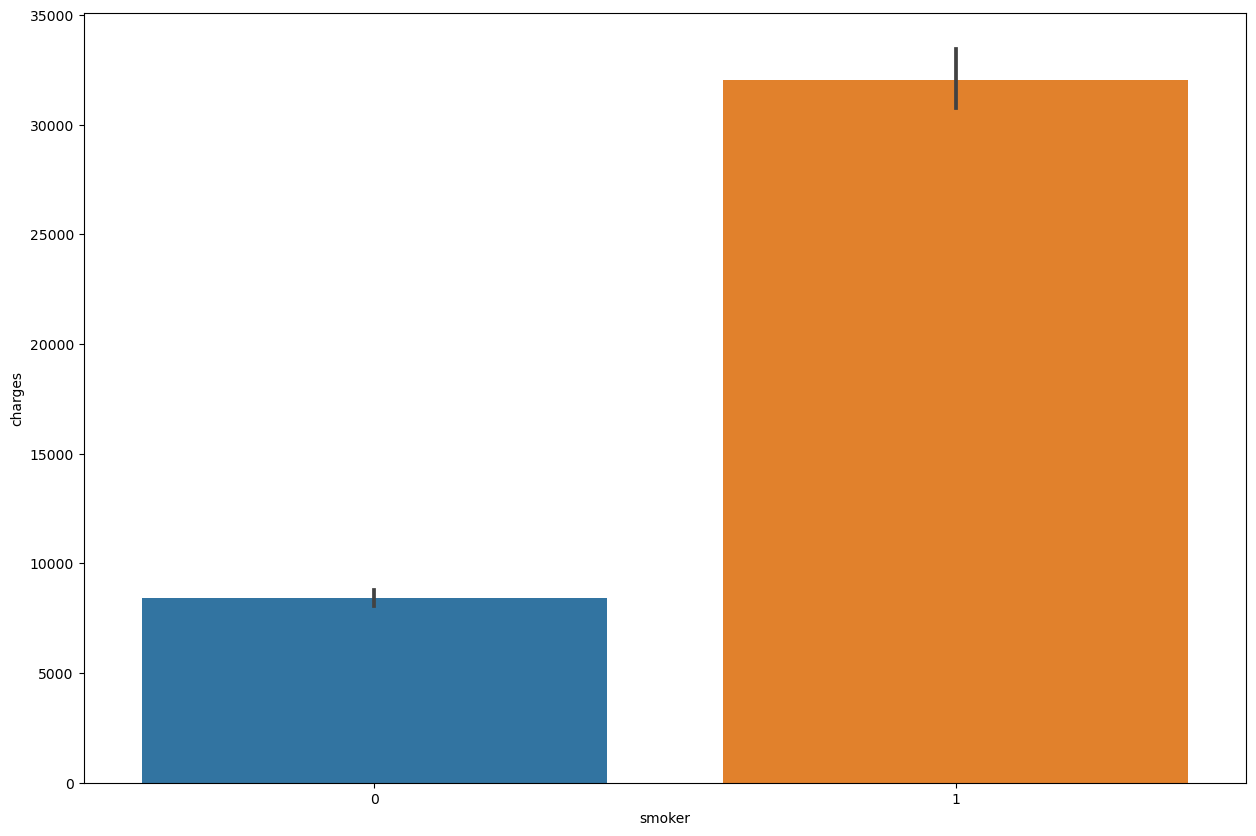

In [9]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x='smoker',y='charges')

## people who smokes means 1 have high charges

<AxesSubplot:xlabel='region', ylabel='charges'>

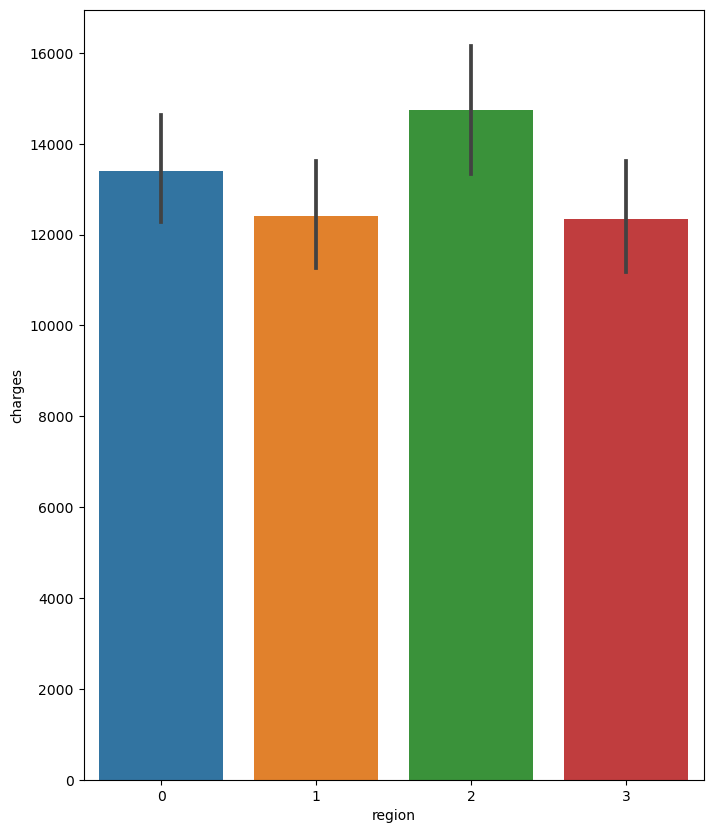

In [10]:
plt.figure(figsize=(8,10))
sns.barplot(data=df,x='region',y='charges')

## here region( 2 )means southeast have high charges and region (3) means southwest have low charges

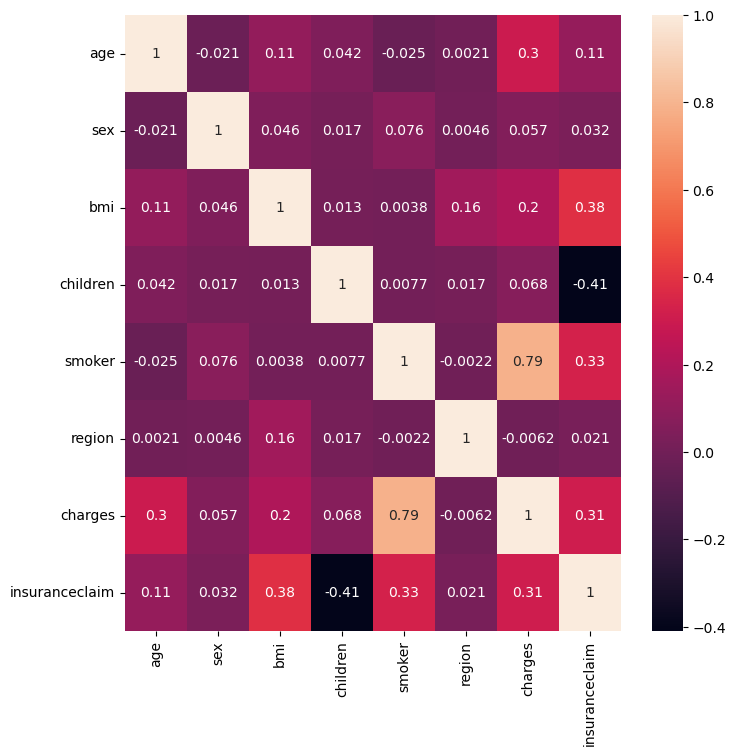

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

. people who smokes have high correlation with charges,means people who somke have high correlation

. children and insuranceclaim has taken negative correlation


<Figure size 640x480 with 0 Axes>

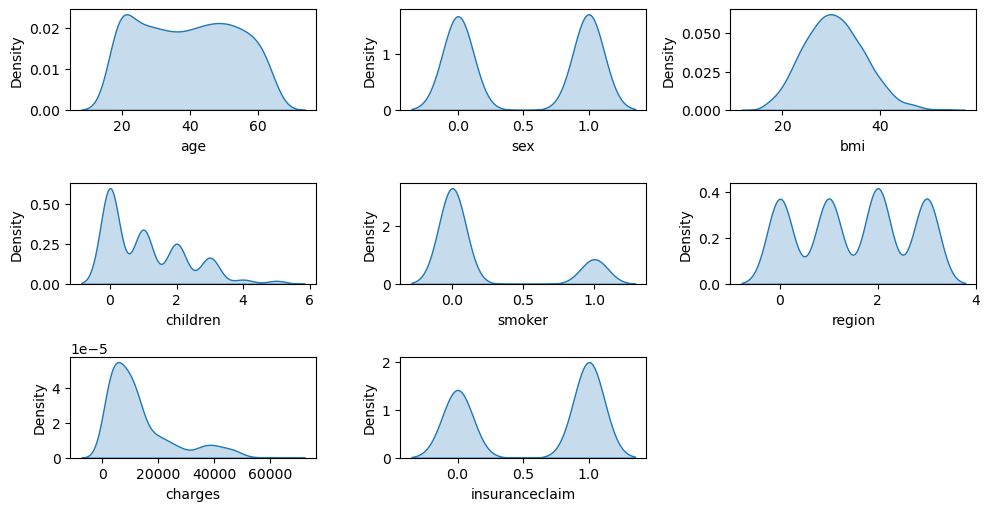

In [12]:
# checking data distribution
plt.suptitle('univariate analysis')
plt.figure(figsize=(10,10))
for i in range(0,len(df.columns)):
    plt.subplot(6,3,i+1)
    sns.kdeplot(x=df.iloc[:,i],shade=True)
    plt.xlabel(df.columns[i])
    plt.tight_layout()

## There are outliers in 'charges' and 'children'

age


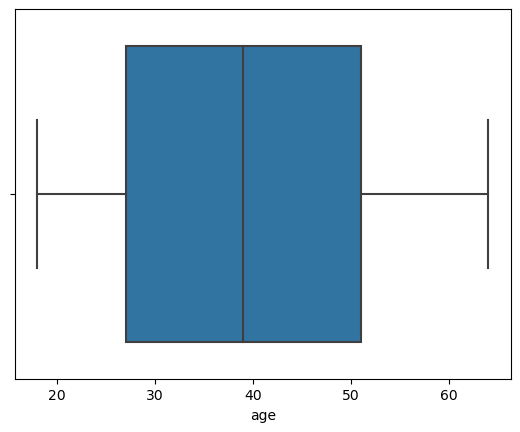

sex


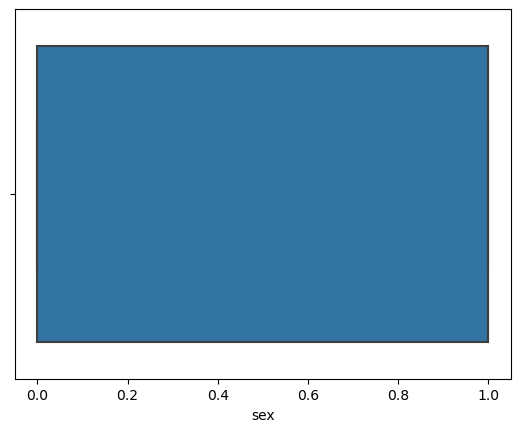

bmi


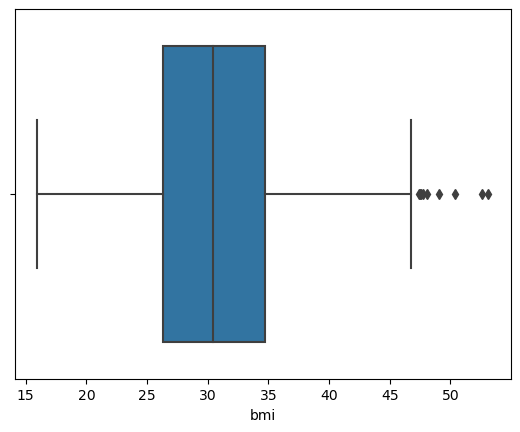

children


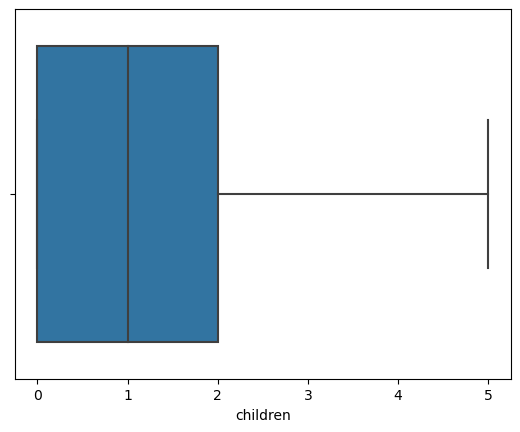

smoker


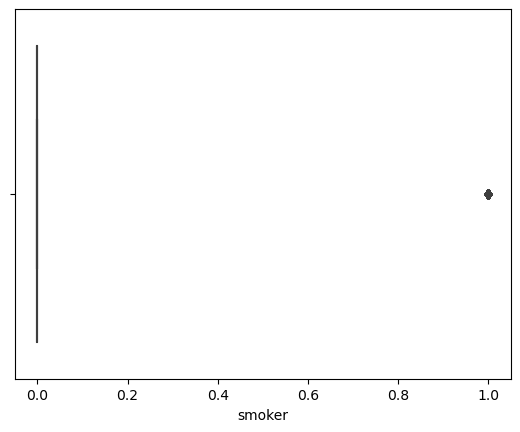

region


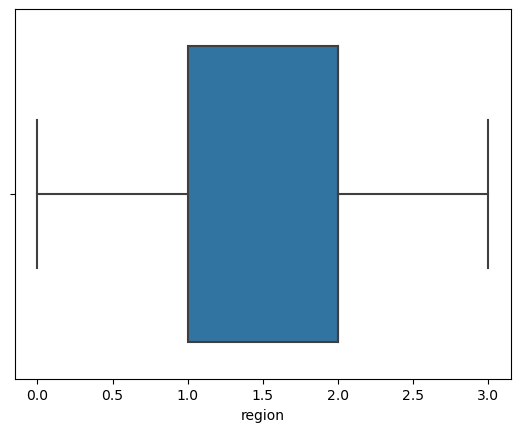

charges


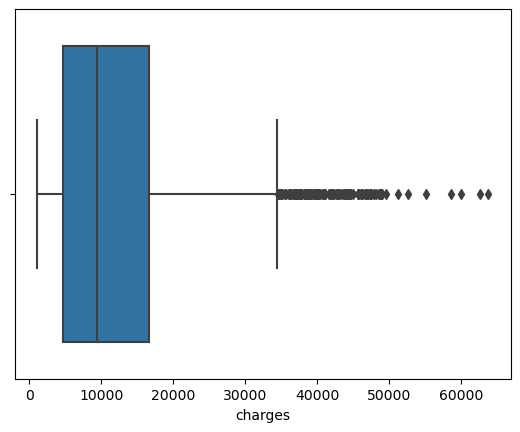

insuranceclaim


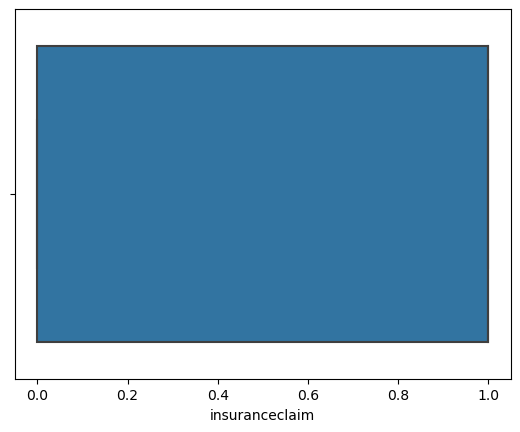

In [13]:
# checking outliers now

for i in df:
    print(i)
    sns.boxplot(x=df[i])
    plt.show()

### 'Bmi' has outliers and people has bmi above 45
### 'Charges' has lots of outliers means this is real data

## Lets see differenet scatter plot in relation with 'Charges'

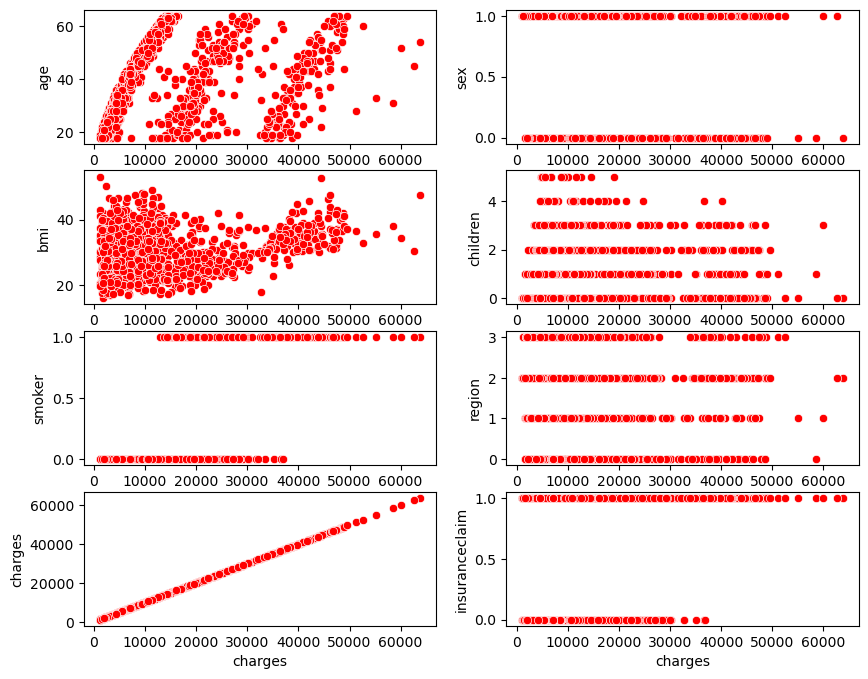

In [14]:
plt.figure(figsize=(10,8))
for i in range(0,len(df.columns)):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x='charges',y=df.iloc[:,i],color='r')
    plt.xlabel('charges')

### Reports

. People mostly claim insurance money who has charges above 30,000

. all 4 region data are proper distributes so its not much related to charges

. people who smokes their charges starts from approx 15,000 which is high

. insurance company should take more premium from who smokes

. people  who dont smoke their charges max max_out at around 80,000

##  4.DATA CLEANING

In [15]:
# checking null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

## checking duplicates

In [16]:
# check duplicates
df[df.duplicated(keep='last')]
#581 and 195 rows no are same we need to drop one 


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
195,19,1,30.59,0,0,1,1639.5631,1


In [17]:
# dropping 1 duplicate row

In [18]:
df1= df.drop_duplicates()
df1


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [19]:
# data is mostly clean  now 


<AxesSubplot:xlabel='age', ylabel='insuranceclaim'>

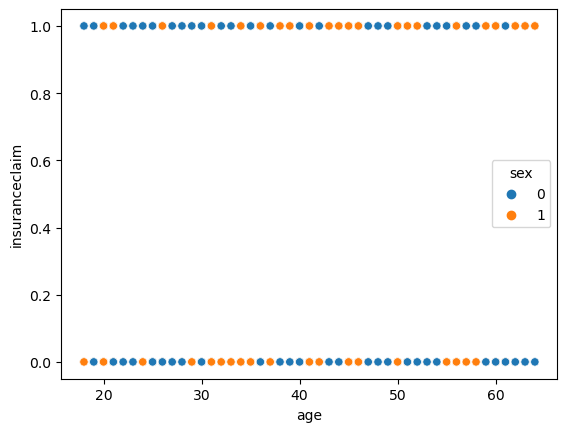

In [20]:
sns.scatterplot(data=df1,x='age',y='insuranceclaim',hue='sex')

## Report

. 'Insuranceclaim' above 60 AGE was claim by males only

<AxesSubplot:xlabel='children', ylabel='age'>

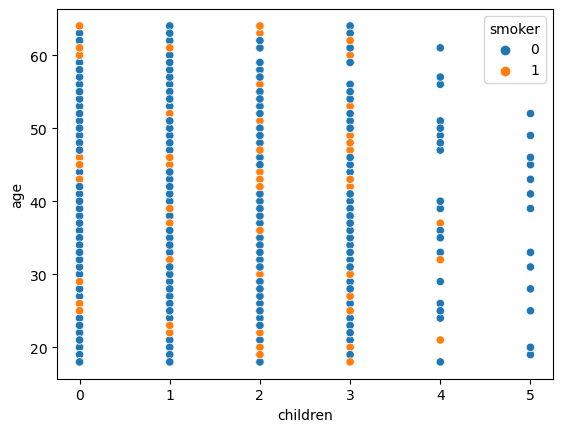

In [21]:
sns.scatterplot(data=df1,x='children',y='age',hue='smoker')

## Report

Above graph looks simple but it has crutial info

People with children generally dont smoke so their charges gonna be less

More the children less it tends to smoke

So its save to give insurance to people with children, which is better for business

<AxesSubplot:xlabel='charges', ylabel='age'>

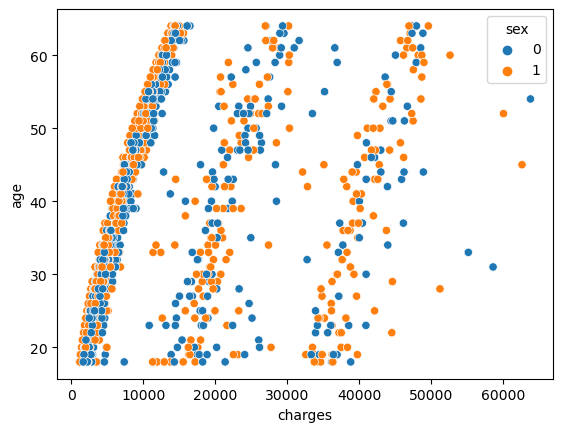

In [22]:
sns.scatterplot(data=df1,x='charges',y='age',hue='sex')

## Report

55_60% people who takes charges above 40000 are males


<AxesSubplot:xlabel='age', ylabel='smoker'>

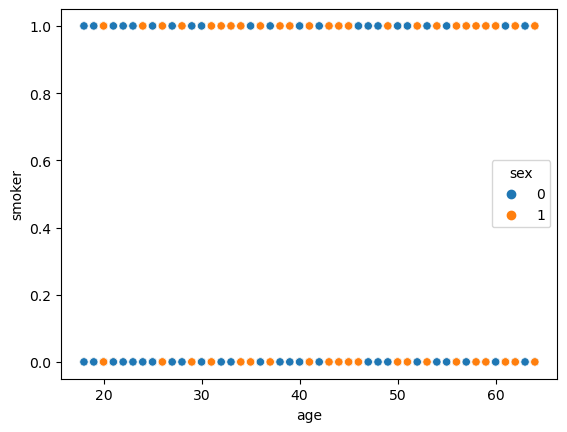

In [23]:
sns.scatterplot(data=df1,x='age',y='smoker',hue='sex')

There is no relation between age and smoker in between both the sex

Text(0.5, 1.0, 'AGE VS CHARGES')

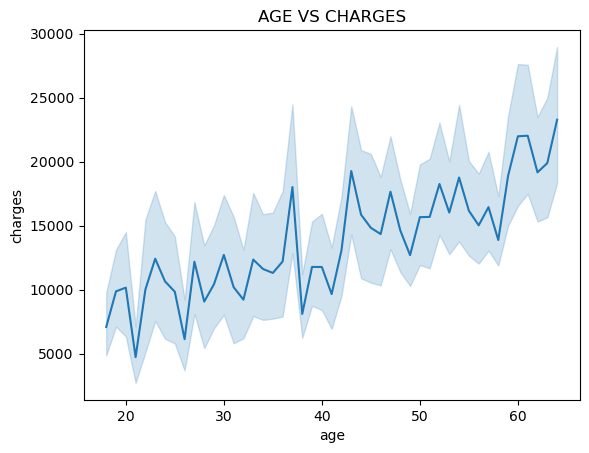

In [24]:
sns.lineplot(data=df1,x='age',y='charges')
plt.title('AGE VS CHARGES')

Text(0.5, 1.0, 'SEX VS CHARGES')

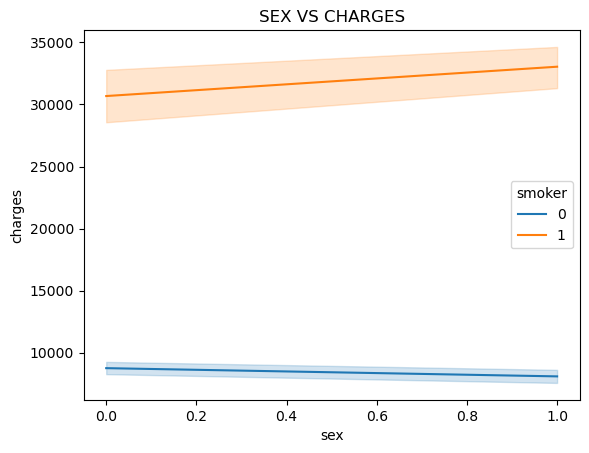

In [25]:
sns.lineplot(data=df1,x='sex',y='charges',hue='smoker')
plt.title('SEX VS CHARGES')

## Report

People with no smoking has less charges ir_respective of charges

People who smokes has more charges, but female tends to have less charges than males overall

## 6. MODEL BUILDING

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### Dividing Features and Labels

In [27]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [28]:
x

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [29]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

dividing train and test data

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)

# keeping train_size 70%

# keeping testing_size 30%

In [31]:
print('x_train_shape',x_train.shape)
print('x_test_shape',x_test.shape)
print('y_train_shape',y_train.shape)
print('y_test_shape',y_test.shape)

x_train_shape (936, 7)
x_test_shape (402, 7)
y_train_shape (936,)
y_test_shape (402,)


## LOGISTIC REGRESSION

In [32]:
# Create an instances of the logistic regression model
model = LogisticRegression()

# fit the model on the training data
model.fit(x_train,y_train)



LogisticRegression()

In [33]:
# make prediction on the testing data
y_pred= model.predict(x_test)

## TESTING

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test, y_pred)

array([[129,  54],
       [ 32, 187]], dtype=int64)

In [36]:
# now we import classification report

from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       183
           1       0.78      0.85      0.81       219

    accuracy                           0.79       402
   macro avg       0.79      0.78      0.78       402
weighted avg       0.79      0.79      0.78       402



In [38]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7860696517412935


## The accuracy is 0.78, meaning that the model correctly predicted 78% of the instances.

## Random Forest Classifier

In [39]:
# initializing the model
rfc=RandomForestClassifier(random_state=23)

#fitting data
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=23)

Prediction

In [40]:
y_pred_rfc=rfc.predict(x_test)
y_pred_rfc

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,

### Checking model score on TEST data set

In [41]:
print(rfc.score(x_test,y_test))

0.9228855721393034


### Checking model score on TRAINING data set

In [42]:
print(rfc.score(x_train,y_train))

1.0


### Checking model score on PREDICTED data

In [43]:
print(rfc.score(x_test,y_pred_rfc))

1.0


### Checking score with metrics

In [44]:
from sklearn.metrics import accuracy_score
score_rfc=accuracy_score(y_test, y_pred_rfc)
print('comparision score between actual and predicted labels',score_rfc)

comparision score between actual and predicted labels 0.9228855721393034


## The accuracy is 0.92, meaning that the model correctly predicted 92% of the instances.

In [45]:
from sklearn import metrics
confusion_matrix= metrics.confusion_matrix(y_test,y_pred_rfc)
confusion_matrix


array([[170,  13],
       [ 18, 201]], dtype=int64)

## doing manual calulation for checking accuracy score

In [46]:
cfm=(170+210)/(170+13+18+210)
print('manual confusion matrix score  checking:',cfm)

manual confusion matrix score  checking: 0.9245742092457421


# REPORT

.USING RANDOM FOREST WE GOT BETTER RESULT OF THE DATA

. AND VALIDATE THAT RESULT WE HAVE DONE MANUAL CALCULATION WITH CONFUSION MATRIX

# 7. Selecting the final model


I am selecting the Random Forest Classifier as my final model.